The total cost is  10.696093749999992
The cost of producing uniformly is  13.3
The cost of producing everything on the last 1 unit of time is  18.1


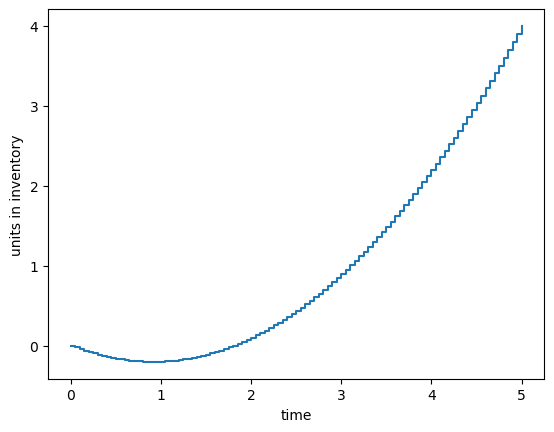

In [12]:
# Let us now sketch the graph of the function (the level sets) and its optimum
import numpy as np

import matplotlib.pyplot as plt
from scipy import optimize

T = 5
B = 4
c1 = 1
c2 = 1

N = 100
delta_t = T/N


def Cost(dx):

    C = 0
    for i in range(N):
        C += c1*dx[i]**2/delta_t + c2*dx[i]*(T-i*delta_t)

    return C

dCost = lambda dx, i: 2*c1*dx[i]/delta_t + c2*(T-i*delta_t)


def Jac(y):
    # y = [dx1, dx2, ... , dxN, lambda]

    J = np.zeros(N+1)
    for i in range(N):
        J[i] = dCost(y,i) - y[N]    

    J[N] = -(sum(y) - y[N] - B)
    
    return J

dx0 = np.ones(N+1);

sol = optimize.fsolve(Jac,dx0)

print('The total cost is ',Cost(sol[0:N]))

othersol = (B/N)*np.ones(N)
C = Cost(othersol)
print('The cost of producing uniformly is ',C)

othersol = np.zeros(N)
for i in range(int(N/T)):
    othersol[N-1-i]=B*(1/int(N/T))
C = Cost(othersol)
print('The cost of producing everything on the last 1 unit of time is ',C)



# Create the inventory array x from the production dx

x = np.zeros(N+1)
S=0
for i in range(N):
    S += sol[i]
    x[i+1] = S


# Plot the inventory 

solplot = np.zeros(2*N+1)
tplot = np.zeros(2*N+1)

t0=0
for i in range(N):
    tplot[2*i]=t0
    t0+=delta_t
    tplot[2*i+1]=t0

    solplot[2*i]=x[i]
    solplot[2*i+1]=x[i]

tplot[2*N]=T
solplot[2*N]=x[N]


plt.plot(tplot, solplot)

plt.ylabel('units in inventory');
plt.xlabel('time');


In [5]:
for i in range(2*N+1):
    print(tplot[i],',',solplot[i])

0.0 , 0.0
1.0 , 0.0
1.0 , 7.75
2.0 , 7.75
2.0 , 16.0
3.0 , 16.0
3.0 , 24.75
4.0 , 24.75
4.0 , 34.0
5.0 , 34.0
5.0 , 43.75
6.0 , 43.75
6.0 , 54.0
7.0 , 54.0
7.0 , 64.75
8.0 , 64.75
8.0 , 76.0
9.0 , 76.0
9.0 , 87.75
10.0 , 87.75
10.0 , 100.0
